In [1]:
from tensorflow.keras.datasets import boston_housing

(train_dataset, train_target), (test_dataset, test_target) = boston_housing.load_data()

In [2]:
print("train dataset :")
print(train_dataset, "\n")

'''train dataset 내 data의 갯수가 매우 적다. 여기서 validation dataset을 따로 배정하면, 해당 dataset 내 data 갯수는 더욱 적어진다.'''
print("train dataset shape :", train_dataset.shape)
print("test dataset shape :", test_dataset.shape)

train dataset :
[[1.23247e+00 0.00000e+00 8.14000e+00 ... 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 ... 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.75520e+02
  3.26000e+00]
 ...
 [3.46600e-02 3.50000e+01 6.06000e+00 ... 1.69000e+01 3.62250e+02
  7.83000e+00]
 [2.14918e+00 0.00000e+00 1.95800e+01 ... 1.47000e+01 2.61950e+02
  1.57900e+01]
 [1.43900e-02 6.00000e+01 2.93000e+00 ... 1.56000e+01 3.76700e+02
  4.38000e+00]] 

train dataset shape : (404, 13)
test dataset shape : (102, 13)


In [3]:
'''각 열에 대한 평균과 표준편차를 원소로가진 numpy array가 생성됨'''
mean = train_dataset.mean(axis = 0)
print("each feature's mean :", mean, "\n")
std = train_dataset.std(axis = 0)
print("each feature's std :", std, "\n")

'''요소별 연산(+. -. *. /)에선 브로드캐스팅이 발생될 수 있다.'''
train_dataset = train_dataset - mean
train_dataset = train_dataset / std
test_dataset = test_dataset - mean
test_dataset = test_dataset / std

each feature's mean : [3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01] 

each feature's std : [9.22929073e+00 2.37382770e+01 6.80287253e+00 2.40939633e-01
 1.17147847e-01 7.08908627e-01 2.79060634e+01 2.02770050e+00
 8.68758849e+00 1.66168506e+02 2.19765689e+00 9.39946015e+01
 7.24556085e+00] 



In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers

'''모델 선언을 함수로 만든 이유는 k-fold validation을 실시할 것이기 때문이다.'''
def build_model():
    
    model = models.Sequential()
    model.add(layers.Dense(64, activation = "relu", input_shape = (13, )))
    model.add(layers.Dense(64, activation = "relu"))
    model.add(layers.Dense(1))
    model.compile(optimizer = "rmsprop", loss = "mse", metrics = ["mae"])
    return model



In [5]:
'''k-fold validation 실시'''
k = 4
num_val_samples = len(train_dataset) // k
print("num_val_samples :", num_val_samples, "\n")
num_epochs = 100
all_scores = []
for i in range(k):
    
    print("처리중인 폴드 #", i)
    val_dataset = train_dataset[i * num_val_samples: (i + 1) * num_val_samples]
    print("val dataset length :", len(val_dataset))
    val_target = train_target[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_dataset = np.concatenate((train_dataset[:i * num_val_samples], train_dataset[(i+1) * num_val_samples:]), axis = 0)
    print("partial train dataset length :", len(partial_train_dataset), "\n")
    partial_train_target = np.concatenate((train_target[:i * num_val_samples], train_target[(i+1) * num_val_samples:]), axis = 0)
    
    model = build_model()
    model.fit(partial_train_dataset, partial_train_target, epochs = num_epochs, batch_size = 1)
    val_mse, val_mae = model.evaluate(val_dataset, val_target)
    all_scores.append(val_mae)

print(all_scores)

    

num_val_samples : 101 

처리중인 폴드 # 0
val dataset length : 101
partial train dataset length : 303 

Epoch 1/100
303/303 [==============================] - 0s 1ms/step - loss: 225.3050 - mae: 11.5487
Epoch 2/100
303/303 [==============================] - 0s 1ms/step - loss: 29.3633 - mae: 3.7098
Epoch 3/100
303/303 [==============================] - 0s 1ms/step - loss: 21.6201 - mae: 3.1079
Epoch 4/100
303/303 [==============================] - 0s 1ms/step - loss: 18.1763 - mae: 2.7662
Epoch 5/100
303/303 [==============================] - 0s 1ms/step - loss: 16.9633 - mae: 2.7091
Epoch 6/100
303/303 [==============================] - 0s 1ms/step - loss: 14.9807 - mae: 2.6656
Epoch 7/100
303/303 [==============================] - 0s 1ms/step - loss: 14.4422 - mae: 2.5718
Epoch 8/100
303/303 [==============================] - 0s 1ms/step - loss: 13.1643 - mae: 2.4821
Epoch 9/100
303/303 [==============================] - 0s 1ms/step - loss: 12.7757 - mae: 2.3780
Epoch 10/100
303/303 [=====

303/303 [==============================] - 0s 1ms/step - loss: 5.3849 - mae: 1.4799
Epoch 67/100
303/303 [==============================] - 0s 1ms/step - loss: 5.3637 - mae: 1.5434
Epoch 68/100
303/303 [==============================] - 0s 1ms/step - loss: 5.1948 - mae: 1.5361
Epoch 69/100
303/303 [==============================] - 0s 1ms/step - loss: 5.0568 - mae: 1.4780
Epoch 70/100
303/303 [==============================] - 0s 1ms/step - loss: 5.0698 - mae: 1.4489
Epoch 71/100
303/303 [==============================] - 0s 1ms/step - loss: 5.2666 - mae: 1.4902
Epoch 72/100
303/303 [==============================] - 0s 1ms/step - loss: 4.6968 - mae: 1.4466
Epoch 73/100
303/303 [==============================] - 0s 1ms/step - loss: 5.1052 - mae: 1.4526
Epoch 74/100
303/303 [==============================] - 0s 1ms/step - loss: 4.6009 - mae: 1.3470
Epoch 75/100
303/303 [==============================] - 0s 1ms/step - loss: 4.7577 - mae: 1.4201
Epoch 76/100
303/303 [=====================

Epoch 49/100
303/303 [==============================] - 0s 1ms/step - loss: 5.5051 - mae: 1.6594
Epoch 50/100
303/303 [==============================] - 0s 1ms/step - loss: 5.4981 - mae: 1.5974
Epoch 51/100
303/303 [==============================] - 0s 1ms/step - loss: 5.1201 - mae: 1.5944
Epoch 52/100
303/303 [==============================] - 0s 1ms/step - loss: 5.2423 - mae: 1.6084
Epoch 53/100
303/303 [==============================] - 0s 1ms/step - loss: 5.4502 - mae: 1.6121
Epoch 54/100
303/303 [==============================] - 0s 1ms/step - loss: 4.9059 - mae: 1.4872
Epoch 55/100
303/303 [==============================] - 0s 1ms/step - loss: 4.9979 - mae: 1.5709
Epoch 56/100
303/303 [==============================] - 0s 1ms/step - loss: 4.8991 - mae: 1.5368
Epoch 57/100
303/303 [==============================] - 0s 1ms/step - loss: 4.7951 - mae: 1.5434
Epoch 58/100
303/303 [==============================] - 0s 1ms/step - loss: 5.0226 - mae: 1.5894
Epoch 59/100
303/303 [========

In [7]:
all_scores = np.array(all_scores)
print(all_scores, "\n")
print(np.mean(all_scores))

[2.14573383 2.55335641 2.50252438 2.26580715] 

2.3668554425239563


In [5]:
'''epoch를 500으로 늘려서 k-fold validation 실시'''
k = 4
num_val_samples = len(train_dataset) // k
print("num_val_samples :", num_val_samples, "\n")
num_epochs = 500
all_mae_histories = []
for i in range(k):
    
    print("처리중인 폴드 #", i)
    val_dataset = train_dataset[i * num_val_samples: (i + 1) * num_val_samples]
    print("val dataset length :", len(val_dataset))
    val_target = train_target[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_dataset = np.concatenate((train_dataset[:i * num_val_samples], train_dataset[(i+1) * num_val_samples:]), axis = 0)
    print("partial train dataset length :", len(partial_train_dataset), "\n")
    partial_train_target = np.concatenate((train_target[:i * num_val_samples], train_target[(i+1) * num_val_samples:]), axis = 0)
    
    model = build_model()
    history = model.fit(partial_train_dataset, partial_train_target, epochs = num_epochs, batch_size = 1, validation_data = (val_dataset, val_target))
    print(history.history)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

num_val_samples : 101 

처리중인 폴드 # 0
val dataset length : 101
partial train dataset length : 303 

Epoch 1/500
303/303 [==============================] - 1s 2ms/step - loss: 169.1669 - mae: 9.5371 - val_loss: 31.2622 - val_mae: 3.7671
Epoch 2/500
303/303 [==============================] - 0s 1ms/step - loss: 28.1688 - mae: 3.7536 - val_loss: 22.7892 - val_mae: 3.0991
Epoch 3/500
303/303 [==============================] - 0s 1ms/step - loss: 20.0879 - mae: 3.0745 - val_loss: 17.0470 - val_mae: 2.7226
Epoch 4/500
303/303 [==============================] - 0s 2ms/step - loss: 17.5853 - mae: 2.7215 - val_loss: 14.9329 - val_mae: 2.7644
Epoch 5/500
303/303 [==============================] - 0s 1ms/step - loss: 16.0496 - mae: 2.6752 - val_loss: 12.9458 - val_mae: 2.4570
Epoch 6/500
303/303 [==============================] - 0s 1ms/step - loss: 15.0175 - mae: 2.5316 - val_loss: 12.8805 - val_mae: 2.4563
Epoch 7/500
303/303 [==============================] - 0s 1ms/step - loss: 14.2962 - mae: 2

303/303 [==============================] - 0s 1ms/step - loss: 5.4655 - mae: 1.5363 - val_loss: 9.2629 - val_mae: 2.3083
Epoch 62/500
303/303 [==============================] - 0s 1ms/step - loss: 5.4731 - mae: 1.5860 - val_loss: 9.4164 - val_mae: 2.2554
Epoch 63/500
303/303 [==============================] - 0s 1ms/step - loss: 5.6091 - mae: 1.5305 - val_loss: 8.1316 - val_mae: 2.0693
Epoch 64/500
303/303 [==============================] - 0s 1ms/step - loss: 5.4715 - mae: 1.5373 - val_loss: 7.8084 - val_mae: 1.9431
Epoch 65/500
303/303 [==============================] - 0s 1ms/step - loss: 5.1941 - mae: 1.5225 - val_loss: 8.7689 - val_mae: 1.9289
Epoch 66/500
303/303 [==============================] - 0s 1ms/step - loss: 5.3798 - mae: 1.5369 - val_loss: 7.9345 - val_mae: 1.9337
Epoch 67/500
303/303 [==============================] - 0s 1ms/step - loss: 5.0117 - mae: 1.5190 - val_loss: 8.2854 - val_mae: 2.0554
Epoch 68/500
303/303 [==============================] - 0s 1ms/step - loss:

303/303 [==============================] - 0s 1ms/step - loss: 3.8389 - mae: 1.2781 - val_loss: 7.7686 - val_mae: 1.9817
Epoch 123/500
303/303 [==============================] - 0s 1ms/step - loss: 3.5303 - mae: 1.2929 - val_loss: 11.6762 - val_mae: 2.4711
Epoch 124/500
303/303 [==============================] - 0s 1ms/step - loss: 3.3941 - mae: 1.2427 - val_loss: 7.9956 - val_mae: 2.1251
Epoch 125/500
303/303 [==============================] - 0s 1ms/step - loss: 3.5506 - mae: 1.2828 - val_loss: 9.9468 - val_mae: 2.2478
Epoch 126/500
303/303 [==============================] - 0s 1ms/step - loss: 3.1957 - mae: 1.1831 - val_loss: 10.2435 - val_mae: 2.4333
Epoch 127/500
303/303 [==============================] - 0s 2ms/step - loss: 3.3306 - mae: 1.2208 - val_loss: 8.1988 - val_mae: 2.0441
Epoch 128/500
303/303 [==============================] - 0s 2ms/step - loss: 3.5456 - mae: 1.2763 - val_loss: 7.5272 - val_mae: 1.9984
Epoch 129/500
303/303 [==============================] - 0s 1ms/ste

Epoch 183/500
303/303 [==============================] - 0s 1ms/step - loss: 2.2827 - mae: 1.0536 - val_loss: 7.9242 - val_mae: 2.0001
Epoch 184/500
303/303 [==============================] - 0s 1ms/step - loss: 2.4105 - mae: 1.0539 - val_loss: 8.2255 - val_mae: 2.0287
Epoch 185/500
303/303 [==============================] - 0s 1ms/step - loss: 2.1453 - mae: 1.0606 - val_loss: 9.1682 - val_mae: 2.1072
Epoch 186/500
303/303 [==============================] - 0s 1ms/step - loss: 2.4554 - mae: 1.0705 - val_loss: 7.3841 - val_mae: 1.9330
Epoch 187/500
303/303 [==============================] - 0s 1ms/step - loss: 2.3069 - mae: 1.0827 - val_loss: 6.9231 - val_mae: 1.8513
Epoch 188/500
303/303 [==============================] - 0s 1ms/step - loss: 2.2304 - mae: 1.0866 - val_loss: 7.9233 - val_mae: 2.0253
Epoch 189/500
303/303 [==============================] - 0s 1ms/step - loss: 2.1493 - mae: 1.0064 - val_loss: 7.7825 - val_mae: 1.9128
Epoch 190/500
303/303 [==============================] 

303/303 [==============================] - 0s 1ms/step - loss: 1.5773 - mae: 0.9100 - val_loss: 11.9192 - val_mae: 2.5356
Epoch 244/500
303/303 [==============================] - 0s 1ms/step - loss: 1.6958 - mae: 0.9075 - val_loss: 9.1680 - val_mae: 2.1342
Epoch 245/500
303/303 [==============================] - 0s 1ms/step - loss: 1.6322 - mae: 0.9215 - val_loss: 10.9293 - val_mae: 2.2596
Epoch 246/500
303/303 [==============================] - 0s 1ms/step - loss: 1.6356 - mae: 0.9179 - val_loss: 7.9548 - val_mae: 2.1147
Epoch 247/500
303/303 [==============================] - 0s 1ms/step - loss: 1.6556 - mae: 0.9427 - val_loss: 8.8448 - val_mae: 2.0703
Epoch 248/500
303/303 [==============================] - 0s 1ms/step - loss: 1.4136 - mae: 0.9051 - val_loss: 8.7209 - val_mae: 2.0695
Epoch 249/500
303/303 [==============================] - 0s 1ms/step - loss: 1.4373 - mae: 0.8825 - val_loss: 8.2289 - val_mae: 1.9980
Epoch 250/500
303/303 [==============================] - 0s 1ms/ste

303/303 [==============================] - 0s 1ms/step - loss: 1.2992 - mae: 0.8178 - val_loss: 9.3731 - val_mae: 2.0018
Epoch 304/500
303/303 [==============================] - 0s 1ms/step - loss: 1.2780 - mae: 0.8271 - val_loss: 9.1473 - val_mae: 2.0233
Epoch 305/500
303/303 [==============================] - 0s 1ms/step - loss: 1.2138 - mae: 0.8449 - val_loss: 8.0956 - val_mae: 1.9945
Epoch 306/500
303/303 [==============================] - 0s 1ms/step - loss: 1.3660 - mae: 0.8875 - val_loss: 8.7873 - val_mae: 2.0527
Epoch 307/500
303/303 [==============================] - 0s 1ms/step - loss: 1.1428 - mae: 0.8001 - val_loss: 9.3281 - val_mae: 2.1351
Epoch 308/500
303/303 [==============================] - 0s 1ms/step - loss: 1.3080 - mae: 0.8270 - val_loss: 10.2009 - val_mae: 2.1262
Epoch 309/500
303/303 [==============================] - 0s 1ms/step - loss: 1.2373 - mae: 0.8248 - val_loss: 11.1566 - val_mae: 2.2630
Epoch 310/500
303/303 [==============================] - 0s 2ms/ste

303/303 [==============================] - 0s 1ms/step - loss: 1.1710 - mae: 0.7906 - val_loss: 9.1294 - val_mae: 2.1144
Epoch 364/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9890 - mae: 0.7328 - val_loss: 9.3280 - val_mae: 2.1738
Epoch 365/500
303/303 [==============================] - 0s 1ms/step - loss: 1.1554 - mae: 0.7720 - val_loss: 9.5826 - val_mae: 2.2057
Epoch 366/500
303/303 [==============================] - 0s 1ms/step - loss: 1.1386 - mae: 0.7846 - val_loss: 12.0110 - val_mae: 2.3258
Epoch 367/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0247 - mae: 0.7254 - val_loss: 9.9602 - val_mae: 2.1491
Epoch 368/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0693 - mae: 0.7563 - val_loss: 11.4105 - val_mae: 2.3121
Epoch 369/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0787 - mae: 0.7436 - val_loss: 9.2120 - val_mae: 2.0619
Epoch 370/500
303/303 [==============================] - 0s 1ms/ste

303/303 [==============================] - 0s 1ms/step - loss: 0.9614 - mae: 0.6996 - val_loss: 10.3896 - val_mae: 2.1509
Epoch 424/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0675 - mae: 0.7568 - val_loss: 10.3685 - val_mae: 2.1321
Epoch 425/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9035 - mae: 0.6907 - val_loss: 9.1528 - val_mae: 2.0370
Epoch 426/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8906 - mae: 0.7092 - val_loss: 10.4943 - val_mae: 2.1545
Epoch 427/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9817 - mae: 0.7255 - val_loss: 11.0098 - val_mae: 2.1817
Epoch 428/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9874 - mae: 0.7151 - val_loss: 11.0402 - val_mae: 2.1434
Epoch 429/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9266 - mae: 0.7173 - val_loss: 10.1101 - val_mae: 2.1381
Epoch 430/500
303/303 [==============================] - 0s 1ms

303/303 [==============================] - 0s 1ms/step - loss: 0.8375 - mae: 0.6628 - val_loss: 10.0172 - val_mae: 2.1881
Epoch 484/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9589 - mae: 0.7308 - val_loss: 10.1216 - val_mae: 2.2316
Epoch 485/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7533 - mae: 0.6587 - val_loss: 9.1218 - val_mae: 2.0865
Epoch 486/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8320 - mae: 0.6741 - val_loss: 10.2032 - val_mae: 2.2138
Epoch 487/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7787 - mae: 0.6509 - val_loss: 10.1391 - val_mae: 2.2306
Epoch 488/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7405 - mae: 0.6398 - val_loss: 8.9109 - val_mae: 2.1050
Epoch 489/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9815 - mae: 0.6959 - val_loss: 11.4861 - val_mae: 2.2684
Epoch 490/500
303/303 [==============================] - 0s 1ms/

Epoch 1/500
303/303 [==============================] - 1s 2ms/step - loss: 199.0404 - mae: 10.5367 - val_loss: 29.0734 - val_mae: 4.0830
Epoch 2/500
303/303 [==============================] - 0s 1ms/step - loss: 32.0258 - mae: 3.7887 - val_loss: 18.5900 - val_mae: 3.2459
Epoch 3/500
303/303 [==============================] - 0s 1ms/step - loss: 21.8571 - mae: 3.0885 - val_loss: 18.0716 - val_mae: 3.3453
Epoch 4/500
303/303 [==============================] - 0s 2ms/step - loss: 17.0655 - mae: 2.7320 - val_loss: 17.3859 - val_mae: 3.3252
Epoch 5/500
303/303 [==============================] - 0s 2ms/step - loss: 15.2474 - mae: 2.5339 - val_loss: 14.3780 - val_mae: 2.9392
Epoch 6/500
303/303 [==============================] - 0s 1ms/step - loss: 14.1139 - mae: 2.4657 - val_loss: 12.6185 - val_mae: 2.7577
Epoch 7/500
303/303 [==============================] - 0s 1ms/step - loss: 12.9492 - mae: 2.3333 - val_loss: 12.0723 - val_mae: 2.6888
Epoch 8/500
303/303 [==============================] 

Epoch 62/500
303/303 [==============================] - 0s 1ms/step - loss: 5.3829 - mae: 1.5466 - val_loss: 8.6151 - val_mae: 2.2951
Epoch 63/500
303/303 [==============================] - 0s 1ms/step - loss: 5.1736 - mae: 1.5304 - val_loss: 8.7732 - val_mae: 2.2727
Epoch 64/500
303/303 [==============================] - 0s 1ms/step - loss: 5.2952 - mae: 1.5320 - val_loss: 8.2528 - val_mae: 2.1359
Epoch 65/500
303/303 [==============================] - 0s 1ms/step - loss: 5.5433 - mae: 1.5204 - val_loss: 9.9288 - val_mae: 2.3732
Epoch 66/500
303/303 [==============================] - 0s 1ms/step - loss: 4.8907 - mae: 1.4420 - val_loss: 10.3162 - val_mae: 2.4269
Epoch 67/500
303/303 [==============================] - 0s 2ms/step - loss: 5.2086 - mae: 1.5309 - val_loss: 9.6481 - val_mae: 2.3679
Epoch 68/500
303/303 [==============================] - 0s 1ms/step - loss: 4.8127 - mae: 1.4899 - val_loss: 9.2603 - val_mae: 2.2933
Epoch 69/500
303/303 [==============================] - 0s 1m

303/303 [==============================] - 0s 1ms/step - loss: 2.7771 - mae: 1.1670 - val_loss: 14.4774 - val_mae: 2.8040
Epoch 123/500
303/303 [==============================] - 0s 2ms/step - loss: 3.0314 - mae: 1.1445 - val_loss: 20.5662 - val_mae: 2.9028
Epoch 124/500
303/303 [==============================] - 0s 2ms/step - loss: 3.0472 - mae: 1.2011 - val_loss: 18.7933 - val_mae: 2.7398
Epoch 125/500
303/303 [==============================] - 0s 2ms/step - loss: 2.9509 - mae: 1.2107 - val_loss: 15.6507 - val_mae: 2.8325
Epoch 126/500
303/303 [==============================] - 0s 1ms/step - loss: 2.7708 - mae: 1.1789 - val_loss: 13.6934 - val_mae: 2.7201
Epoch 127/500
303/303 [==============================] - 0s 1ms/step - loss: 2.7344 - mae: 1.1763 - val_loss: 16.4221 - val_mae: 2.6621
Epoch 128/500
303/303 [==============================] - 0s 1ms/step - loss: 2.9158 - mae: 1.2200 - val_loss: 18.7653 - val_mae: 3.0547
Epoch 129/500
303/303 [==============================] - 0s 1m

303/303 [==============================] - 0s 1ms/step - loss: 1.9707 - mae: 1.0334 - val_loss: 19.0561 - val_mae: 3.0525
Epoch 183/500
303/303 [==============================] - 0s 1ms/step - loss: 1.9125 - mae: 0.9870 - val_loss: 16.3425 - val_mae: 2.8134
Epoch 184/500
303/303 [==============================] - 0s 1ms/step - loss: 1.7243 - mae: 0.9876 - val_loss: 25.8488 - val_mae: 3.3070
Epoch 185/500
303/303 [==============================] - 0s 1ms/step - loss: 1.6882 - mae: 0.9785 - val_loss: 20.0398 - val_mae: 3.0383
Epoch 186/500
303/303 [==============================] - 0s 1ms/step - loss: 1.8261 - mae: 1.0197 - val_loss: 17.5144 - val_mae: 2.9068
Epoch 187/500
303/303 [==============================] - 0s 1ms/step - loss: 1.6675 - mae: 0.9632 - val_loss: 18.9960 - val_mae: 2.9462
Epoch 188/500
303/303 [==============================] - 0s 1ms/step - loss: 1.9139 - mae: 1.0225 - val_loss: 19.4862 - val_mae: 2.7590
Epoch 189/500
303/303 [==============================] - 0s 1m

303/303 [==============================] - 0s 1ms/step - loss: 1.2990 - mae: 0.8404 - val_loss: 23.6226 - val_mae: 3.1001
Epoch 243/500
303/303 [==============================] - 0s 1ms/step - loss: 1.3573 - mae: 0.8853 - val_loss: 18.8627 - val_mae: 2.9290
Epoch 244/500
303/303 [==============================] - 0s 1ms/step - loss: 1.2472 - mae: 0.8024 - val_loss: 22.1455 - val_mae: 2.9329
Epoch 245/500
303/303 [==============================] - 0s 1ms/step - loss: 1.2617 - mae: 0.8249 - val_loss: 27.2961 - val_mae: 3.1594
Epoch 246/500
303/303 [==============================] - 0s 1ms/step - loss: 1.3205 - mae: 0.8616 - val_loss: 21.8063 - val_mae: 3.0673
Epoch 247/500
303/303 [==============================] - 0s 1ms/step - loss: 1.3064 - mae: 0.8613 - val_loss: 21.6335 - val_mae: 2.8914
Epoch 248/500
303/303 [==============================] - 0s 1ms/step - loss: 1.3699 - mae: 0.8422 - val_loss: 27.5049 - val_mae: 3.3228
Epoch 249/500
303/303 [==============================] - 0s 1m

303/303 [==============================] - 0s 1ms/step - loss: 1.2084 - mae: 0.7906 - val_loss: 21.2806 - val_mae: 2.9257
Epoch 303/500
303/303 [==============================] - 0s 1ms/step - loss: 1.1539 - mae: 0.8025 - val_loss: 22.9417 - val_mae: 3.1018
Epoch 304/500
303/303 [==============================] - 0s 2ms/step - loss: 1.0855 - mae: 0.7969 - val_loss: 21.4977 - val_mae: 3.0083
Epoch 305/500
303/303 [==============================] - 0s 1ms/step - loss: 1.1183 - mae: 0.7815 - val_loss: 25.8310 - val_mae: 3.0726
Epoch 306/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0267 - mae: 0.7579 - val_loss: 19.0502 - val_mae: 2.9567
Epoch 307/500
303/303 [==============================] - 0s 1ms/step - loss: 1.1315 - mae: 0.7877 - val_loss: 21.5880 - val_mae: 2.8962
Epoch 308/500
303/303 [==============================] - 0s 1ms/step - loss: 1.1071 - mae: 0.7822 - val_loss: 21.6957 - val_mae: 2.9672
Epoch 309/500
303/303 [==============================] - 0s 1m

303/303 [==============================] - 0s 1ms/step - loss: 0.9366 - mae: 0.7154 - val_loss: 19.0286 - val_mae: 2.9208
Epoch 363/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8517 - mae: 0.6853 - val_loss: 21.7898 - val_mae: 2.9346
Epoch 364/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8462 - mae: 0.7038 - val_loss: 27.0923 - val_mae: 3.1991
Epoch 365/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9790 - mae: 0.7139 - val_loss: 21.5194 - val_mae: 2.9771
Epoch 366/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8382 - mae: 0.6743 - val_loss: 17.9738 - val_mae: 2.8349
Epoch 367/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8663 - mae: 0.6916 - val_loss: 22.4396 - val_mae: 3.0838
Epoch 368/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0003 - mae: 0.7209 - val_loss: 18.4781 - val_mae: 2.8482
Epoch 369/500
303/303 [==============================] - 0s 1m

303/303 [==============================] - 0s 1ms/step - loss: 0.7635 - mae: 0.6425 - val_loss: 19.9466 - val_mae: 2.8627
Epoch 423/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7871 - mae: 0.6723 - val_loss: 21.6439 - val_mae: 2.9365
Epoch 424/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7239 - mae: 0.6524 - val_loss: 21.7737 - val_mae: 2.9131
Epoch 425/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7336 - mae: 0.6449 - val_loss: 21.4593 - val_mae: 2.9122
Epoch 426/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8421 - mae: 0.6697 - val_loss: 21.6029 - val_mae: 3.0028
Epoch 427/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8819 - mae: 0.6639 - val_loss: 16.7351 - val_mae: 2.7556
Epoch 428/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7352 - mae: 0.6413 - val_loss: 17.9247 - val_mae: 2.7840
Epoch 429/500
303/303 [==============================] - 0s 1m

303/303 [==============================] - 0s 1ms/step - loss: 0.7876 - mae: 0.6443 - val_loss: 22.7166 - val_mae: 2.9649
Epoch 483/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8094 - mae: 0.6431 - val_loss: 20.0415 - val_mae: 2.8738
Epoch 484/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7557 - mae: 0.6217 - val_loss: 26.1855 - val_mae: 3.2412
Epoch 485/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7219 - mae: 0.6265 - val_loss: 20.3417 - val_mae: 2.9399
Epoch 486/500
303/303 [==============================] - 0s 2ms/step - loss: 0.8054 - mae: 0.6156 - val_loss: 24.7293 - val_mae: 3.2328
Epoch 487/500
303/303 [==============================] - 0s 1ms/step - loss: 0.6382 - mae: 0.6204 - val_loss: 20.7884 - val_mae: 2.9072
Epoch 488/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7607 - mae: 0.6559 - val_loss: 26.2935 - val_mae: 3.2027
Epoch 489/500
303/303 [==============================] - 0s 1m

303/303 [==============================] - 0s 2ms/step - loss: 200.8285 - mae: 10.6455 - val_loss: 30.9744 - val_mae: 3.7951
Epoch 2/500
303/303 [==============================] - 1s 2ms/step - loss: 27.1330 - mae: 3.5048 - val_loss: 24.1228 - val_mae: 3.2304
Epoch 3/500
303/303 [==============================] - 0s 1ms/step - loss: 20.8248 - mae: 3.0004 - val_loss: 19.3686 - val_mae: 2.6729
Epoch 4/500
303/303 [==============================] - 0s 1ms/step - loss: 16.5973 - mae: 2.7387 - val_loss: 17.7149 - val_mae: 2.7118
Epoch 5/500
303/303 [==============================] - 0s 1ms/step - loss: 14.6324 - mae: 2.5259 - val_loss: 18.3121 - val_mae: 3.0066
Epoch 6/500
303/303 [==============================] - 0s 1ms/step - loss: 12.9871 - mae: 2.4960 - val_loss: 17.0034 - val_mae: 2.5829
Epoch 7/500
303/303 [==============================] - 0s 2ms/step - loss: 12.0732 - mae: 2.4304 - val_loss: 16.6430 - val_mae: 2.6534
Epoch 8/500
303/303 [==============================] - 0s 1ms/ste

Epoch 62/500
303/303 [==============================] - 0s 1ms/step - loss: 4.0287 - mae: 1.3756 - val_loss: 13.3156 - val_mae: 2.4560
Epoch 63/500
303/303 [==============================] - 0s 1ms/step - loss: 4.1007 - mae: 1.4324 - val_loss: 14.4468 - val_mae: 2.5163
Epoch 64/500
303/303 [==============================] - 0s 1ms/step - loss: 3.9875 - mae: 1.4322 - val_loss: 13.4069 - val_mae: 2.4094
Epoch 65/500
303/303 [==============================] - 0s 1ms/step - loss: 3.9402 - mae: 1.4103 - val_loss: 14.0917 - val_mae: 2.6739
Epoch 66/500
303/303 [==============================] - 0s 1ms/step - loss: 4.2840 - mae: 1.4780 - val_loss: 15.8178 - val_mae: 2.7705
Epoch 67/500
303/303 [==============================] - 0s 1ms/step - loss: 3.9598 - mae: 1.4437 - val_loss: 14.3045 - val_mae: 2.7054
Epoch 68/500
303/303 [==============================] - 0s 1ms/step - loss: 3.8091 - mae: 1.4183 - val_loss: 13.6803 - val_mae: 2.4654
Epoch 69/500
303/303 [==============================] -

303/303 [==============================] - 0s 2ms/step - loss: 2.2664 - mae: 1.0741 - val_loss: 14.9559 - val_mae: 2.6573
Epoch 123/500
303/303 [==============================] - 0s 1ms/step - loss: 2.3442 - mae: 1.1269 - val_loss: 15.3703 - val_mae: 2.8130
Epoch 124/500
303/303 [==============================] - 0s 1ms/step - loss: 2.6003 - mae: 1.1629 - val_loss: 15.0771 - val_mae: 2.7192
Epoch 125/500
303/303 [==============================] - 0s 1ms/step - loss: 2.1251 - mae: 1.0603 - val_loss: 15.0690 - val_mae: 2.7248
Epoch 126/500
303/303 [==============================] - 0s 2ms/step - loss: 2.0444 - mae: 1.0512 - val_loss: 16.6899 - val_mae: 2.8224
Epoch 127/500
303/303 [==============================] - 0s 1ms/step - loss: 1.9474 - mae: 1.0078 - val_loss: 16.3424 - val_mae: 2.7992
Epoch 128/500
303/303 [==============================] - 0s 1ms/step - loss: 2.1742 - mae: 1.0825 - val_loss: 15.9596 - val_mae: 2.8276
Epoch 129/500
303/303 [==============================] - 0s 1m

303/303 [==============================] - 0s 1ms/step - loss: 1.6866 - mae: 0.9378 - val_loss: 16.4556 - val_mae: 2.8795
Epoch 183/500
303/303 [==============================] - 0s 2ms/step - loss: 1.4770 - mae: 0.9051 - val_loss: 17.7387 - val_mae: 2.9293
Epoch 184/500
303/303 [==============================] - 0s 1ms/step - loss: 1.5598 - mae: 0.9305 - val_loss: 18.1428 - val_mae: 2.9011
Epoch 185/500
303/303 [==============================] - 0s 1ms/step - loss: 1.6716 - mae: 0.9379 - val_loss: 16.7502 - val_mae: 2.8380
Epoch 186/500
303/303 [==============================] - 0s 1ms/step - loss: 1.4927 - mae: 0.9006 - val_loss: 17.7262 - val_mae: 2.9597
Epoch 187/500
303/303 [==============================] - 0s 1ms/step - loss: 1.6202 - mae: 0.9348 - val_loss: 16.2950 - val_mae: 2.8586
Epoch 188/500
303/303 [==============================] - 0s 1ms/step - loss: 1.4397 - mae: 0.8859 - val_loss: 16.4931 - val_mae: 2.8232
Epoch 189/500
303/303 [==============================] - 0s 1m

303/303 [==============================] - 0s 1ms/step - loss: 1.3361 - mae: 0.8284 - val_loss: 18.3883 - val_mae: 2.9970
Epoch 243/500
303/303 [==============================] - 0s 1ms/step - loss: 1.3756 - mae: 0.8649 - val_loss: 17.9680 - val_mae: 2.8462
Epoch 244/500
303/303 [==============================] - 0s 1ms/step - loss: 1.3052 - mae: 0.7799 - val_loss: 18.8314 - val_mae: 2.9984
Epoch 245/500
303/303 [==============================] - 0s 1ms/step - loss: 1.2599 - mae: 0.8084 - val_loss: 17.0978 - val_mae: 2.8811
Epoch 246/500
303/303 [==============================] - 0s 1ms/step - loss: 1.3067 - mae: 0.8299 - val_loss: 17.0868 - val_mae: 2.8950
Epoch 247/500
303/303 [==============================] - 0s 1ms/step - loss: 1.3333 - mae: 0.8263 - val_loss: 19.3154 - val_mae: 3.0475
Epoch 248/500
303/303 [==============================] - 0s 1ms/step - loss: 1.5170 - mae: 0.8412 - val_loss: 18.5185 - val_mae: 2.9583
Epoch 249/500
303/303 [==============================] - 0s 1m

303/303 [==============================] - 0s 2ms/step - loss: 1.1561 - mae: 0.7609 - val_loss: 18.8749 - val_mae: 2.8790
Epoch 303/500
303/303 [==============================] - 0s 1ms/step - loss: 1.1382 - mae: 0.7867 - val_loss: 19.4698 - val_mae: 2.9512
Epoch 304/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0340 - mae: 0.7373 - val_loss: 18.9623 - val_mae: 3.0096
Epoch 305/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0497 - mae: 0.7108 - val_loss: 19.7145 - val_mae: 3.0177
Epoch 306/500
303/303 [==============================] - 0s 1ms/step - loss: 1.1738 - mae: 0.7780 - val_loss: 18.4124 - val_mae: 2.9014
Epoch 307/500
303/303 [==============================] - 0s 1ms/step - loss: 1.1045 - mae: 0.7395 - val_loss: 18.8393 - val_mae: 3.0311
Epoch 308/500
303/303 [==============================] - 0s 1ms/step - loss: 1.1271 - mae: 0.7551 - val_loss: 18.8357 - val_mae: 3.0869
Epoch 309/500
303/303 [==============================] - 0s 1m

303/303 [==============================] - 0s 1ms/step - loss: 0.7916 - mae: 0.6260 - val_loss: 19.6874 - val_mae: 2.9989
Epoch 363/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0316 - mae: 0.7089 - val_loss: 20.0412 - val_mae: 3.2404
Epoch 364/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9051 - mae: 0.6917 - val_loss: 19.8963 - val_mae: 3.1089
Epoch 365/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8549 - mae: 0.6740 - val_loss: 19.0256 - val_mae: 3.0299
Epoch 366/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0403 - mae: 0.6980 - val_loss: 19.1457 - val_mae: 3.0589
Epoch 367/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9705 - mae: 0.7083 - val_loss: 19.4045 - val_mae: 3.1997
Epoch 368/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9798 - mae: 0.6982 - val_loss: 19.8679 - val_mae: 3.0897
Epoch 369/500
303/303 [==============================] - 0s 1m

303/303 [==============================] - 0s 1ms/step - loss: 0.8537 - mae: 0.6683 - val_loss: 18.5350 - val_mae: 2.9123
Epoch 423/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7360 - mae: 0.6229 - val_loss: 18.7048 - val_mae: 2.9009
Epoch 424/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8645 - mae: 0.6713 - val_loss: 18.1152 - val_mae: 2.9442
Epoch 425/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7529 - mae: 0.6318 - val_loss: 17.6210 - val_mae: 2.8616
Epoch 426/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8500 - mae: 0.6504 - val_loss: 17.1618 - val_mae: 2.8480
Epoch 427/500
303/303 [==============================] - 0s 1ms/step - loss: 0.6846 - mae: 0.5956 - val_loss: 18.9382 - val_mae: 3.0176
Epoch 428/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7545 - mae: 0.6295 - val_loss: 18.8210 - val_mae: 2.9178
Epoch 429/500
303/303 [==============================] - 0s 1m

303/303 [==============================] - 0s 1ms/step - loss: 0.7174 - mae: 0.6160 - val_loss: 17.8555 - val_mae: 2.9268
Epoch 483/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7337 - mae: 0.6326 - val_loss: 17.6068 - val_mae: 2.8586
Epoch 484/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7933 - mae: 0.6242 - val_loss: 18.6852 - val_mae: 2.9585
Epoch 485/500
303/303 [==============================] - 0s 1ms/step - loss: 0.6672 - mae: 0.5847 - val_loss: 18.2428 - val_mae: 2.9904
Epoch 486/500
303/303 [==============================] - 0s 1ms/step - loss: 0.6493 - mae: 0.5681 - val_loss: 17.8258 - val_mae: 2.8792
Epoch 487/500
303/303 [==============================] - 0s 1ms/step - loss: 0.6052 - mae: 0.5646 - val_loss: 18.3058 - val_mae: 2.9961
Epoch 488/500
303/303 [==============================] - 0s 1ms/step - loss: 0.6843 - mae: 0.5870 - val_loss: 19.0595 - val_mae: 3.0515
Epoch 489/500
303/303 [==============================] - 0s 1m

303/303 [==============================] - 1s 2ms/step - loss: 188.8351 - mae: 10.5784 - val_loss: 60.2455 - val_mae: 5.4488
Epoch 2/500
303/303 [==============================] - 0s 2ms/step - loss: 27.1509 - mae: 3.6182 - val_loss: 35.6036 - val_mae: 3.7987
Epoch 3/500
303/303 [==============================] - 1s 2ms/step - loss: 19.0041 - mae: 2.9497 - val_loss: 27.6333 - val_mae: 3.4974
Epoch 4/500
303/303 [==============================] - 1s 2ms/step - loss: 15.7496 - mae: 2.7187 - val_loss: 25.9293 - val_mae: 3.2854
Epoch 5/500
303/303 [==============================] - 0s 2ms/step - loss: 14.3860 - mae: 2.5495 - val_loss: 23.8215 - val_mae: 3.2327
Epoch 6/500
303/303 [==============================] - 1s 2ms/step - loss: 13.1636 - mae: 2.3930 - val_loss: 19.9380 - val_mae: 2.8129
Epoch 7/500
303/303 [==============================] - 1s 2ms/step - loss: 12.2626 - mae: 2.3316 - val_loss: 22.3175 - val_mae: 3.0849
Epoch 8/500
303/303 [==============================] - 0s 2ms/ste

Epoch 62/500
303/303 [==============================] - 0s 1ms/step - loss: 5.6855 - mae: 1.4793 - val_loss: 14.3229 - val_mae: 2.8909
Epoch 63/500
303/303 [==============================] - 0s 1ms/step - loss: 5.7174 - mae: 1.5454 - val_loss: 9.8228 - val_mae: 2.2522
Epoch 64/500
303/303 [==============================] - 0s 2ms/step - loss: 5.2418 - mae: 1.5211 - val_loss: 12.3172 - val_mae: 2.6218
Epoch 65/500
303/303 [==============================] - 0s 1ms/step - loss: 5.7210 - mae: 1.4810 - val_loss: 12.7751 - val_mae: 2.6078
Epoch 66/500
303/303 [==============================] - 0s 1ms/step - loss: 5.4468 - mae: 1.5256 - val_loss: 10.8774 - val_mae: 2.4009
Epoch 67/500
303/303 [==============================] - 0s 1ms/step - loss: 5.4723 - mae: 1.4842 - val_loss: 10.6184 - val_mae: 2.4499
Epoch 68/500
303/303 [==============================] - 0s 1ms/step - loss: 5.2164 - mae: 1.4973 - val_loss: 11.6566 - val_mae: 2.5238
Epoch 69/500
303/303 [==============================] - 

303/303 [==============================] - 0s 2ms/step - loss: 3.5051 - mae: 1.1983 - val_loss: 12.4330 - val_mae: 2.6275
Epoch 123/500
303/303 [==============================] - 0s 2ms/step - loss: 3.7023 - mae: 1.2539 - val_loss: 10.7678 - val_mae: 2.3739
Epoch 124/500
303/303 [==============================] - 0s 1ms/step - loss: 3.9461 - mae: 1.2735 - val_loss: 11.2039 - val_mae: 2.4836
Epoch 125/500
303/303 [==============================] - 0s 1ms/step - loss: 3.6349 - mae: 1.2588 - val_loss: 10.1323 - val_mae: 2.3552
Epoch 126/500
303/303 [==============================] - 0s 1ms/step - loss: 3.6433 - mae: 1.2219 - val_loss: 11.0628 - val_mae: 2.4458
Epoch 127/500
303/303 [==============================] - 0s 1ms/step - loss: 3.4791 - mae: 1.1881 - val_loss: 12.2068 - val_mae: 2.6498
Epoch 128/500
303/303 [==============================] - 0s 2ms/step - loss: 3.6716 - mae: 1.2260 - val_loss: 12.7985 - val_mae: 2.6271
Epoch 129/500
303/303 [==============================] - 0s 2m

303/303 [==============================] - 0s 1ms/step - loss: 2.9888 - mae: 1.0543 - val_loss: 11.1295 - val_mae: 2.4910
Epoch 183/500
303/303 [==============================] - 0s 1ms/step - loss: 2.9625 - mae: 1.1388 - val_loss: 10.5955 - val_mae: 2.4152
Epoch 184/500
303/303 [==============================] - 0s 1ms/step - loss: 2.7714 - mae: 1.0733 - val_loss: 11.2485 - val_mae: 2.5086
Epoch 185/500
303/303 [==============================] - 0s 1ms/step - loss: 2.8073 - mae: 1.0594 - val_loss: 11.6333 - val_mae: 2.4251
Epoch 186/500
303/303 [==============================] - 0s 2ms/step - loss: 2.7858 - mae: 1.0526 - val_loss: 11.1001 - val_mae: 2.4515
Epoch 187/500
303/303 [==============================] - 0s 1ms/step - loss: 2.7326 - mae: 1.1173 - val_loss: 11.2643 - val_mae: 2.4306
Epoch 188/500
303/303 [==============================] - 0s 1ms/step - loss: 2.6443 - mae: 1.0773 - val_loss: 12.6397 - val_mae: 2.6348
Epoch 189/500
303/303 [==============================] - 0s 1m

303/303 [==============================] - 0s 1ms/step - loss: 2.0388 - mae: 0.9714 - val_loss: 12.8111 - val_mae: 2.6366
Epoch 243/500
303/303 [==============================] - 0s 2ms/step - loss: 1.9309 - mae: 0.9421 - val_loss: 11.3520 - val_mae: 2.4003
Epoch 244/500
303/303 [==============================] - 0s 1ms/step - loss: 1.9647 - mae: 0.9661 - val_loss: 10.7727 - val_mae: 2.4951
Epoch 245/500
303/303 [==============================] - 0s 1ms/step - loss: 2.2123 - mae: 1.0522 - val_loss: 11.0124 - val_mae: 2.4139
Epoch 246/500
303/303 [==============================] - 0s 1ms/step - loss: 2.1193 - mae: 0.9862 - val_loss: 11.5094 - val_mae: 2.4339
Epoch 247/500
303/303 [==============================] - 0s 2ms/step - loss: 2.3379 - mae: 1.0150 - val_loss: 11.1180 - val_mae: 2.4288
Epoch 248/500
303/303 [==============================] - 0s 2ms/step - loss: 1.7777 - mae: 0.9345 - val_loss: 12.1391 - val_mae: 2.4636
Epoch 249/500
303/303 [==============================] - 1s 2m

303/303 [==============================] - 0s 1ms/step - loss: 1.6143 - mae: 0.9058 - val_loss: 13.3159 - val_mae: 2.6466
Epoch 303/500
303/303 [==============================] - 0s 1ms/step - loss: 1.5736 - mae: 0.9207 - val_loss: 13.3890 - val_mae: 2.6421
Epoch 304/500
303/303 [==============================] - 0s 1ms/step - loss: 1.6965 - mae: 0.9144 - val_loss: 10.9659 - val_mae: 2.3917
Epoch 305/500
303/303 [==============================] - 0s 1ms/step - loss: 1.5693 - mae: 0.8884 - val_loss: 12.0582 - val_mae: 2.5490
Epoch 306/500
303/303 [==============================] - 0s 2ms/step - loss: 1.5911 - mae: 0.8648 - val_loss: 12.7780 - val_mae: 2.6047
Epoch 307/500
303/303 [==============================] - 0s 1ms/step - loss: 1.6655 - mae: 0.9232 - val_loss: 11.9580 - val_mae: 2.4773
Epoch 308/500
303/303 [==============================] - 0s 1ms/step - loss: 1.8995 - mae: 0.9303 - val_loss: 13.2552 - val_mae: 2.7170
Epoch 309/500
303/303 [==============================] - 0s 1m

303/303 [==============================] - 1s 2ms/step - loss: 1.3022 - mae: 0.8147 - val_loss: 13.0293 - val_mae: 2.5256
Epoch 363/500
303/303 [==============================] - 1s 2ms/step - loss: 1.1759 - mae: 0.8261 - val_loss: 11.6128 - val_mae: 2.4108
Epoch 364/500
303/303 [==============================] - 1s 2ms/step - loss: 1.4379 - mae: 0.8160 - val_loss: 11.8893 - val_mae: 2.5542
Epoch 365/500
303/303 [==============================] - 1s 2ms/step - loss: 1.2841 - mae: 0.8261 - val_loss: 12.3451 - val_mae: 2.5340
Epoch 366/500
303/303 [==============================] - 1s 2ms/step - loss: 1.2564 - mae: 0.8025 - val_loss: 12.4198 - val_mae: 2.5628
Epoch 367/500
303/303 [==============================] - 0s 2ms/step - loss: 1.2332 - mae: 0.8120 - val_loss: 11.8329 - val_mae: 2.4956
Epoch 368/500
303/303 [==============================] - 0s 2ms/step - loss: 1.2072 - mae: 0.7994 - val_loss: 12.2713 - val_mae: 2.5478
Epoch 369/500
303/303 [==============================] - 0s 2m

303/303 [==============================] - 0s 2ms/step - loss: 1.0647 - mae: 0.7423 - val_loss: 12.5296 - val_mae: 2.5876
Epoch 423/500
303/303 [==============================] - 1s 2ms/step - loss: 1.0309 - mae: 0.7287 - val_loss: 12.3910 - val_mae: 2.6042
Epoch 424/500
303/303 [==============================] - 1s 2ms/step - loss: 1.0198 - mae: 0.7503 - val_loss: 12.3167 - val_mae: 2.6003
Epoch 425/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9102 - mae: 0.7017 - val_loss: 13.2754 - val_mae: 2.6709
Epoch 426/500
303/303 [==============================] - 1s 2ms/step - loss: 1.0671 - mae: 0.7413 - val_loss: 11.9394 - val_mae: 2.5147
Epoch 427/500
303/303 [==============================] - 1s 2ms/step - loss: 1.0572 - mae: 0.7433 - val_loss: 12.1318 - val_mae: 2.5042
Epoch 428/500
303/303 [==============================] - 1s 2ms/step - loss: 1.1677 - mae: 0.7636 - val_loss: 13.6853 - val_mae: 2.6818
Epoch 429/500
303/303 [==============================] - 1s 2m

303/303 [==============================] - 0s 2ms/step - loss: 1.0184 - mae: 0.7174 - val_loss: 12.8189 - val_mae: 2.4978
Epoch 483/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8360 - mae: 0.6749 - val_loss: 12.3622 - val_mae: 2.5408
Epoch 484/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9049 - mae: 0.7001 - val_loss: 13.2177 - val_mae: 2.6628
Epoch 485/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9110 - mae: 0.7023 - val_loss: 13.7264 - val_mae: 2.6910
Epoch 486/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9891 - mae: 0.7281 - val_loss: 12.2104 - val_mae: 2.5550
Epoch 487/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9535 - mae: 0.7160 - val_loss: 12.0639 - val_mae: 2.5347
Epoch 488/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9002 - mae: 0.6878 - val_loss: 11.9088 - val_mae: 2.4828
Epoch 489/500
303/303 [==============================] - 0s 1m

NameError: name 'all_scores' is not defined

In [14]:
'''all_mae_histories는 이중 리스트이다.'''
print(len(all_mae_histories), "\n")
print(all_mae_histories)

4 

[[3.7670838832855225, 3.0991060733795166, 2.7226386070251465, 2.764411211013794, 2.4570000171661377, 2.456251859664917, 2.3074986934661865, 2.294332981109619, 2.3292455673217773, 2.227768898010254, 2.1451306343078613, 2.691549062728882, 2.153608560562134, 2.051494836807251, 2.039030075073242, 2.2612059116363525, 1.9586124420166016, 2.1077358722686768, 2.1238276958465576, 2.227989673614502, 2.155609369277954, 2.1182444095611572, 2.1692893505096436, 2.266859531402588, 1.9535667896270752, 1.922837495803833, 1.8820586204528809, 1.9426456689834595, 1.891787052154541, 2.4073991775512695, 2.092867374420166, 2.1900105476379395, 2.052060842514038, 2.419346332550049, 2.0409340858459473, 1.8983449935913086, 2.046050786972046, 2.085064649581909, 2.043778896331787, 2.3678789138793945, 2.8516130447387695, 2.216881513595581, 2.1114096641540527, 2.274568796157837, 1.982646107673645, 2.46282696723938, 2.2056822776794434, 1.968042016029358, 2.2110190391540527, 2.2737882137298584, 2.0307953357696533,

In [15]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
print("average_mae_history :", average_mae_history, "\n")

average_mae_history : [4.273504674434662, 3.3435150384902954, 3.05957692861557, 3.0217209458351135, 2.9088903665542603, 2.6524367928504944, 2.6836518049240112, 2.548970878124237, 2.5433077812194824, 2.5037314891815186, 2.6312626004219055, 2.685997426509857, 2.5650583505630493, 2.438284695148468, 2.4327131509780884, 2.5140220522880554, 2.4080600142478943, 2.5028622150421143, 2.6444746255874634, 2.471288740634918, 2.470007598400116, 2.4408462047576904, 2.3847816586494446, 2.633400321006775, 2.4244437217712402, 2.369419276714325, 2.305304765701294, 2.336580127477646, 2.432836592197418, 2.480007588863373, 2.342105805873871, 2.322129786014557, 2.3396559357643127, 2.5191648602485657, 2.3676634430885315, 2.3268268704414368, 2.3468164801597595, 2.28200900554657, 2.453055679798126, 2.5098676085472107, 2.499000608921051, 2.3944026827812195, 2.368779242038727, 2.387495756149292, 2.332527667284012, 2.467275619506836, 2.393152356147766, 2.278596669435501, 2.3919586539268494, 2.3646042943000793, 2.3

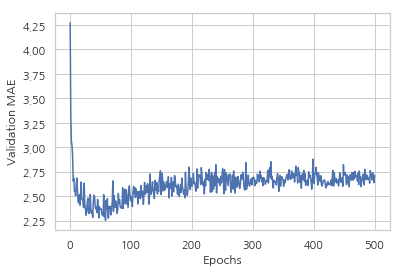

In [17]:
%matplotlib inline

plt.plot(list(range(1, num_epochs + 1)), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()